In [1]:
import numpy as np
import pandas as pd
import ROOT
import matplotlib.pyplot as plt
import truth_neutron_visualization as v
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('text', usetex=False)

Welcome to JupyROOT 6.22/02


In [2]:
a = v.analysis()

In [3]:
MC = a.get_MC_data('RBB_Lumi')
MC_LER = a.get_MC_data('Touschek_LER')

In [4]:
elepaio = MC['elepaio_RBB_Lumi']
palila = MC['palila_RBB_Lumi']
tako = MC['tako_RBB_Lumi']
iiwi = MC_LER['iiwi_Touschek_LER']
tako = tako.loc[(tako['truthNeutronVtx_z_belle_frame']>-870) & 
               (tako['truthNeutronVtx_z_belle_frame']<-750) & (tako['truthNeutronVtx_x_belle_frame']>20) & 
               (tako['truthNeutronVtx_x_belle_frame']<60) & (np.abs(tako['truthNeutronVtx_y_belle_frame'])<20)]

palila = palila.loc[(palila['truthNeutronVtx_z_belle_frame']>-870) & 
               (palila['truthNeutronVtx_z_belle_frame']<-750) & (palila['truthNeutronVtx_x_belle_frame']>20) & 
               (palila['truthNeutronVtx_x_belle_frame']<60) & (np.abs(palila['truthNeutronVtx_y_belle_frame'])<20)]

elepaio = elepaio.loc[(elepaio['truthNeutronVtx_z_belle_frame']>-870) & 
               (elepaio['truthNeutronVtx_z_belle_frame']<-750) & (elepaio['truthNeutronVtx_x_belle_frame']>20) & 
               (elepaio['truthNeutronVtx_x_belle_frame']<60) & (np.abs(elepaio['truthNeutronVtx_y_belle_frame'])<20)]

### Convert to 1MeV fluxes weighted by NIEL

In [5]:
def add_NIEL_weights(df, ekey = 'truthNeutronEnergy'):
    conversion = [] #list to be added to dataframe
    e = df[ekey].to_numpy() #use numpy to speed things up
    neutrons = pd.read_csv('neutrons.csv')
    neutrons = neutrons.drop(columns = neutrons.columns[0])
    conv = neutrons[['E','weight']].to_numpy()
    for i in range(0,len(e)):
        index = 0
        diff = 1e9
        for j in range(0,len(conv)):
            if np.abs(e[i] - conv[j][0]) < diff:
                diff = np.abs(e[i] - conv[j][0])
                index = j
        conversion.append(conv[index][1])
    df['NIEL_weight'] = conversion
add_NIEL_weights(tako)
add_NIEL_weights(palila)
add_NIEL_weights(elepaio)
add_NIEL_weights(iiwi)

<ipython-input-5-ec9bcf4c6f9c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NIEL_weight'] = conversion


In [11]:
print(tako['NIEL_weight'].sum())
print(palila['NIEL_weight'].sum())
print(elepaio['NIEL_weight'].sum())
print(iiwi['NIEL_weight'].sum())

1754.17544
947.179137
245.015157
6811.736274


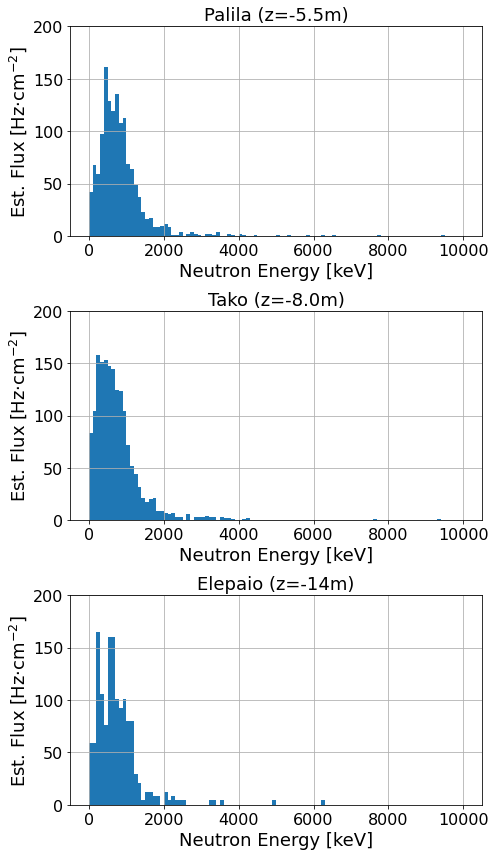

In [15]:
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

fig, ax = plt.subplots(3,1, figsize = (7,12))
(counts, bins) = np.histogram(palila['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 1.16
ax[0].hist(bins[:-1], bins, weights=factor*counts)
ax[0].set_xlabel('Neutron Energy [keV]')
ax[0].set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax[0].set_title('Palila (z=-5.5m)')
ax[0].set_ylim(0,200)
ax[0].grid()

(counts, bins) = np.histogram(tako['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.732
ax[1].hist(bins[:-1], bins, weights=factor*counts)

ax[1].set_xlabel('Neutron Energy [keV]')
ax[1].set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax[1].set_title('Tako (z=-8.0m)')
ax[1].set_ylim(0,200)
ax[1].grid()

(counts, bins) = np.histogram(elepaio['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 4.22
ax[2].hist(bins[:-1], bins, weights=factor*counts)
ax[2].set_xlabel('Neutron Energy [keV]')
ax[2].set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax[2].set_title('Elepaio (z=-14m)')
ax[2].set_ylim(0,200)
ax[2].grid()

plt.tight_layout()
plt.show()

In [ ]:
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

fig, ax = plt.subplots(1,1)
(counts, bins) = np.histogram(iiwi['truthNeutronEnergy'], bins=100, range = (0,1e4))
factor = 0.145
ax.hist(bins[:-1], bins, weights=factor*counts)
ax.set_xlabel('Neutron Energy [keV]')
ax.set_ylabel(r'Est. Flux [Hz$\cdot$cm$^{-2}$]')
ax.set_title('Iiwi (z=+6.5m)')
ax.set_ylim(0,125)

#(counts, bins) = np.histogram(tako['truthNeutronEnergy'], bins=100, range = (0,1e4))
#factor = 0.732
#ax.hist(bins[:-1], bins, histtype = 'step', weights=factor*counts)
ax.grid()

### Convert fluxes to 1MeV equivalent rates weighted by NIEL

In [ ]:
df = pd.read_csv('neutrons.csv')
df = df.drop(columns = df.columns[0])

In [ ]:
tako

In [ ]:
ne = tako['truthNeutronEnergy'].to_numpy()
conv = df[['E','weight']].to_numpy()

In [ ]:
conversion = []
for i in range(0,len(tako)):
    index = 0
    diff = 1000
    for j in range(0,len(df)):
        if np.abs(ne[i] - conv[j][0]) < diff:
            diff = np.abs(ne[i] - conv[j][0])
            index = j
    conversion.append(conv[index][1])
        

In [ ]:
df.loc[df['E']>80]

In [ ]:
tako['truthNeutronEnergy']

In [ ]:
conversion